# **Project: Providing data-driven suggestions for HR**

# Pace: Plan Stage

### Understand the business scenario and problem

The HR department at Salifort Motors seeks to improve employee satisfaction and reduce turnover. They have collected employee data but need guidance on how to utilize it. The mission is to analyze this data to identify factors contributing to employee departures and build a predictive model for employee turnover. The ultimate goal is to enhance employee retention, which will save the company time and resources in hiring new staff.

### About the HR dataset

The dataset in this project contains 15,000 rows and 10 columns for the variables listed below. 

**Data source:** [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import necessary packages.
*   Load dataset.



### Import packages

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
# pd.set_option('display.max_columns', None)

# For data modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

# For saving models
import pickle

# For hint warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load dataset

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand variables.
- Clean dataset (missing data, redundant data, outliers).



### Gather basic information about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Numeric data
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [5]:
# Categorical data
df.select_dtypes('object').describe()

Department salary
count       14999  14999
unique         10      3
top         sales    low
freq         4140   7316

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in "`snake case`", correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns
df = df.rename(columns={'Work_accident': 'work_accident', # W - > w
                          'average_montly_hours': 'average_monthly_hours', # montly -> monthly
                          'time_spend_company': 'term', # -> term equivalents time_spend_company but shorter
                          'Department': 'department'}) # D -> d

# All column names after the update
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'term', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
term                     0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

-> There are no missing values.

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
num_dup = df.duplicated().sum()
dup_percent = round(num_dup*100/df.shape[0],2)
print(f'Number of duplicate entries are {num_dup}, and that is {dup_percent}% of the data.')

Number of duplicate entries are 3008, and that is 20.05% of the data.


In [10]:
# Inspect some rows containing duplicates
df[df.duplicated()].head(5)

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  term  work_accident  left  promotion_last_5years  \
396                     139     3              0     1                      0   
866                     128     3              0     1                      0   
1317                    127     3              0     1                      0   
1368                    132     3              0     1                      0   
1461                    142     3              0     1                      0   

      department  salary  
396        sales     low  
866   accounting     low  
1317       sales  medium  
1368       RandD     low  
1461       sales     low

In [11]:
# Drop duplicates 
df_v1 = df.drop_duplicates()

# Display first few rows of new dataframe
df_v1.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   term  work_accident  left  promotion_last_5years department  salary  
0     3              0     1                      0      sales     low  
1     6              0     1                      0      sales  medium  
2     4              0     1                      0      sales  medium  
3     5              0     1                      0      sales     low  
4     3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

In [12]:
# Numeric columns
numeric_cols = df_v1.select_dtypes(include=['float', 'int']).columns

# Categorical columns
cate_cols = df_v1.select_dtypes('object').columns

In [13]:
# Show all category columns
cate_cols

Index(['department', 'salary'], dtype='object')

In [14]:
# Show all numeric columns
numeric_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'term', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

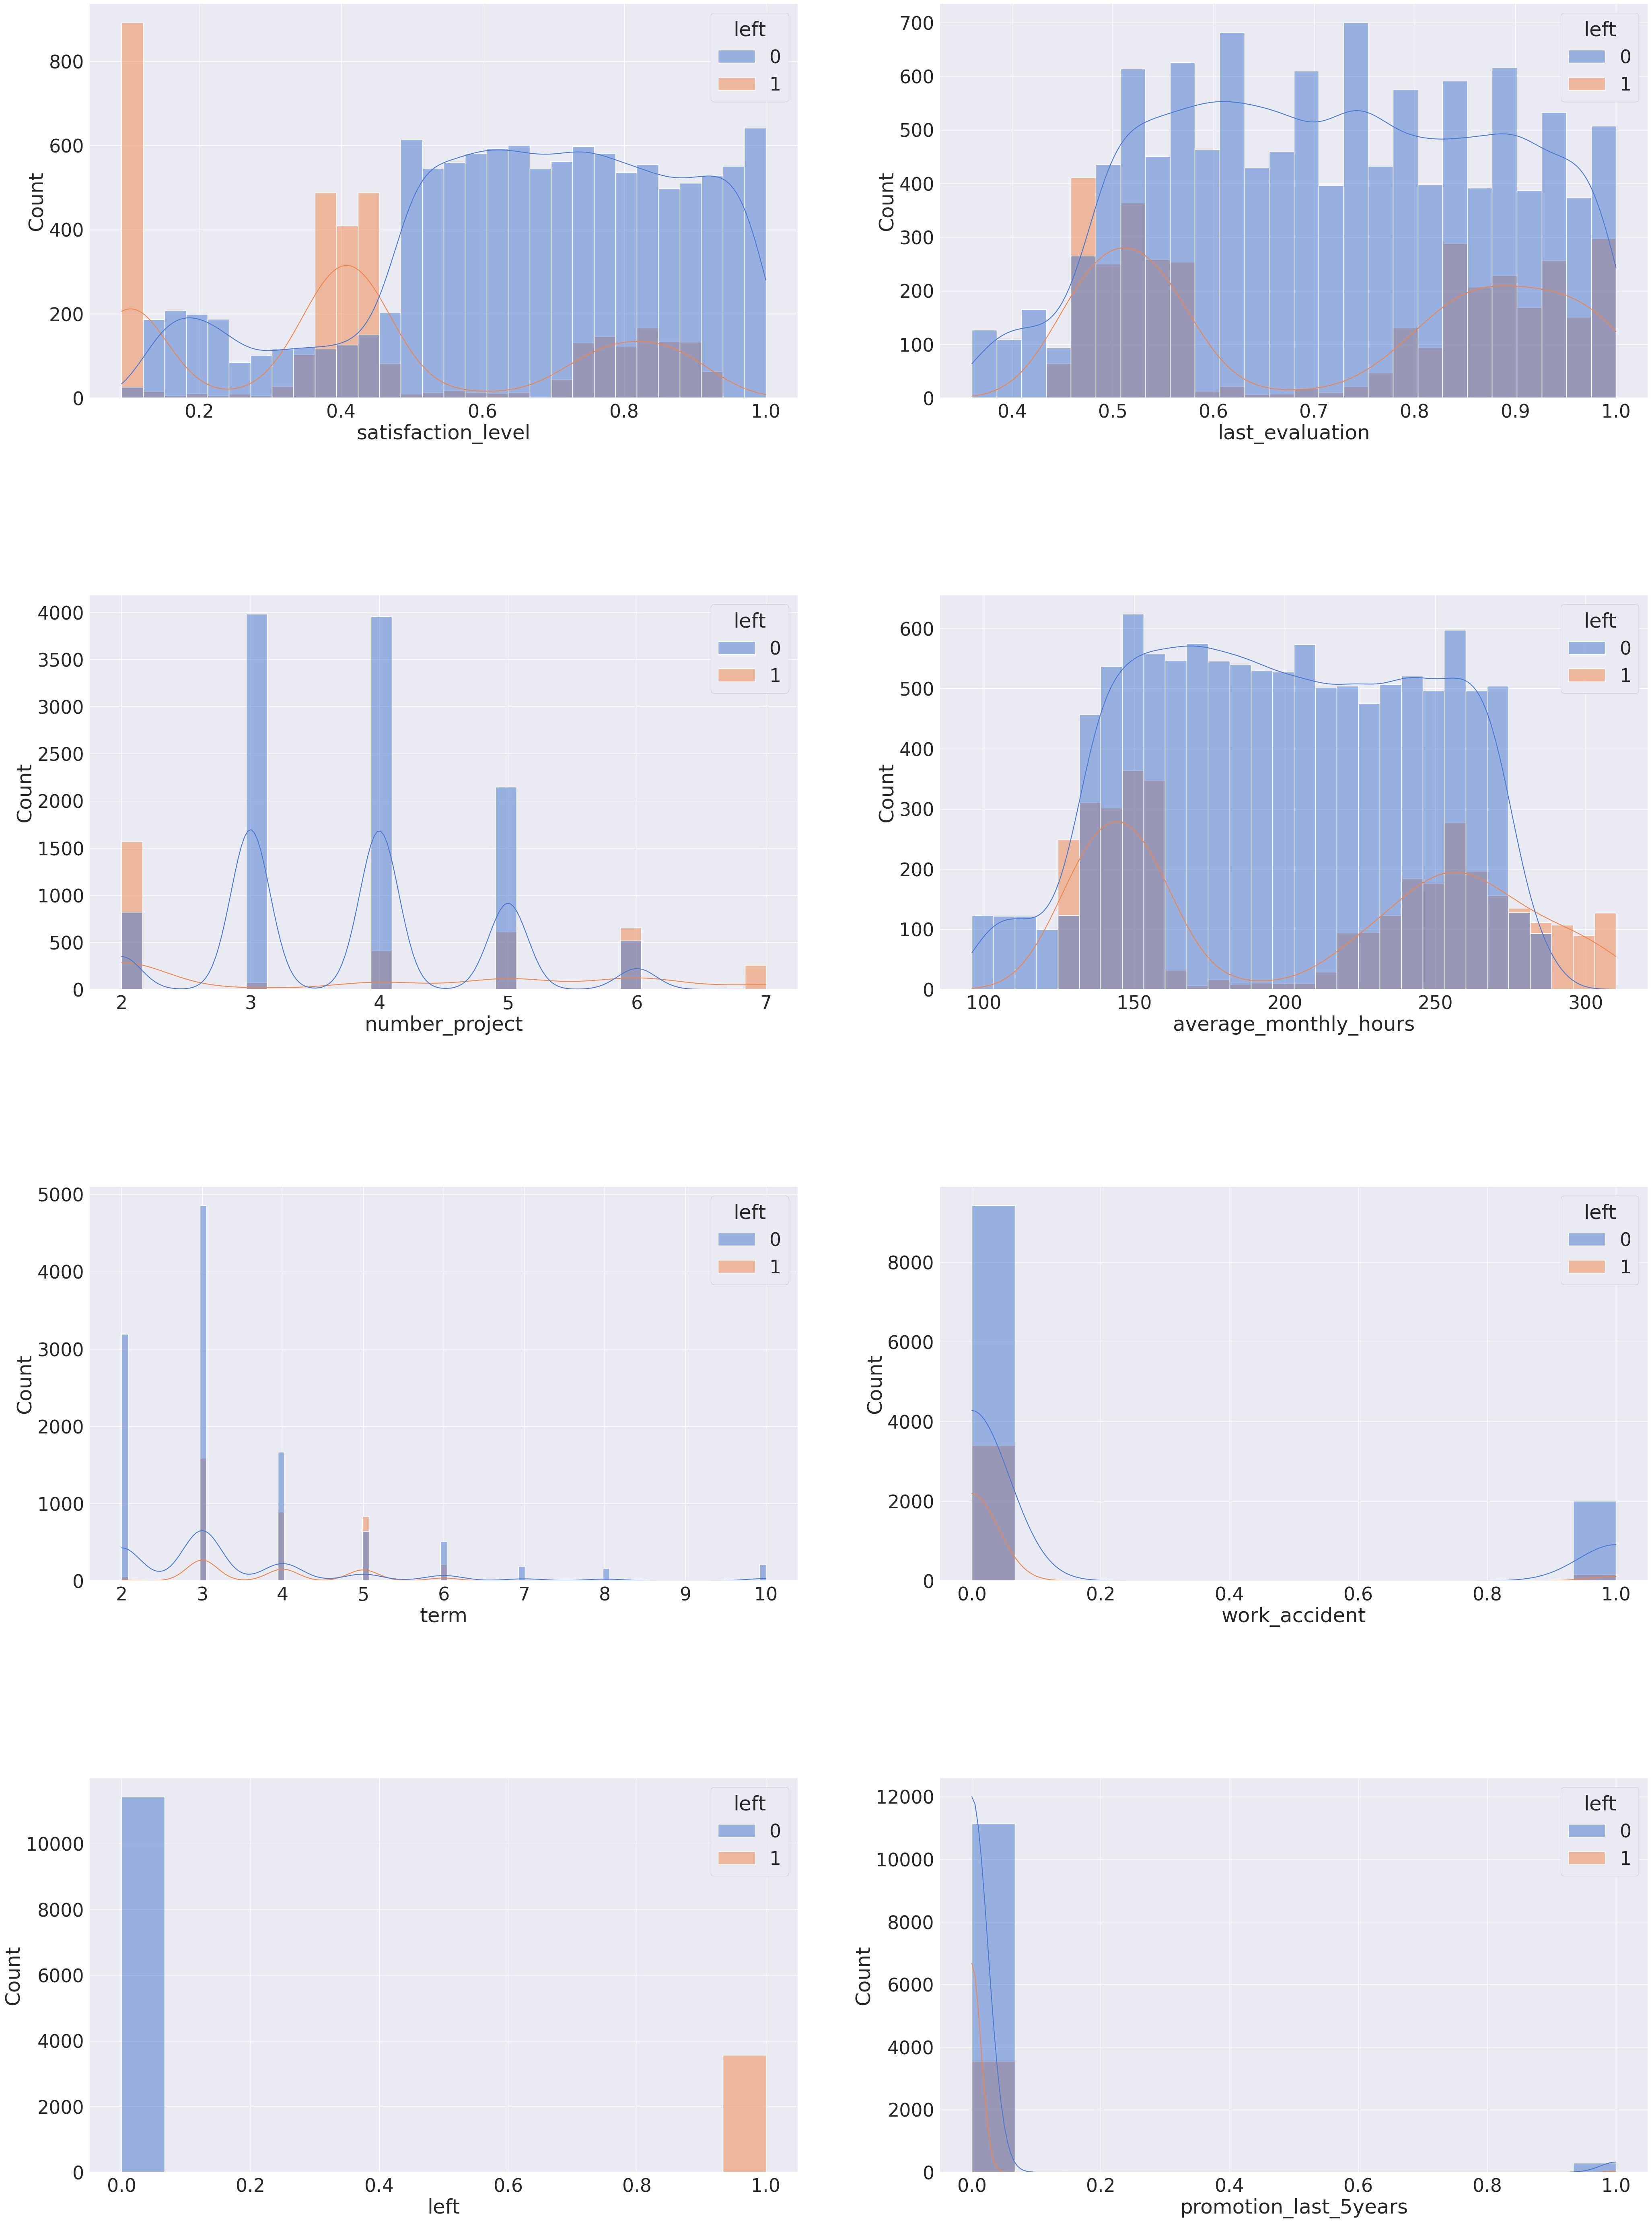

In [15]:
# Use histogram for visualizing all numeric columns
with sns.axes_style("white"):
    sns.set(font_scale=3)
    plt.figure(figsize = (50,70))
    sns.set_palette("bright")
    plt.subplots_adjust(hspace=0.5)
    i = 1
    for name in numeric_cols:
        plt.subplot(4, 2, i)
        sns.histplot(data=df, x=name, hue="left", kde=True, palette="muted")
        i += 1

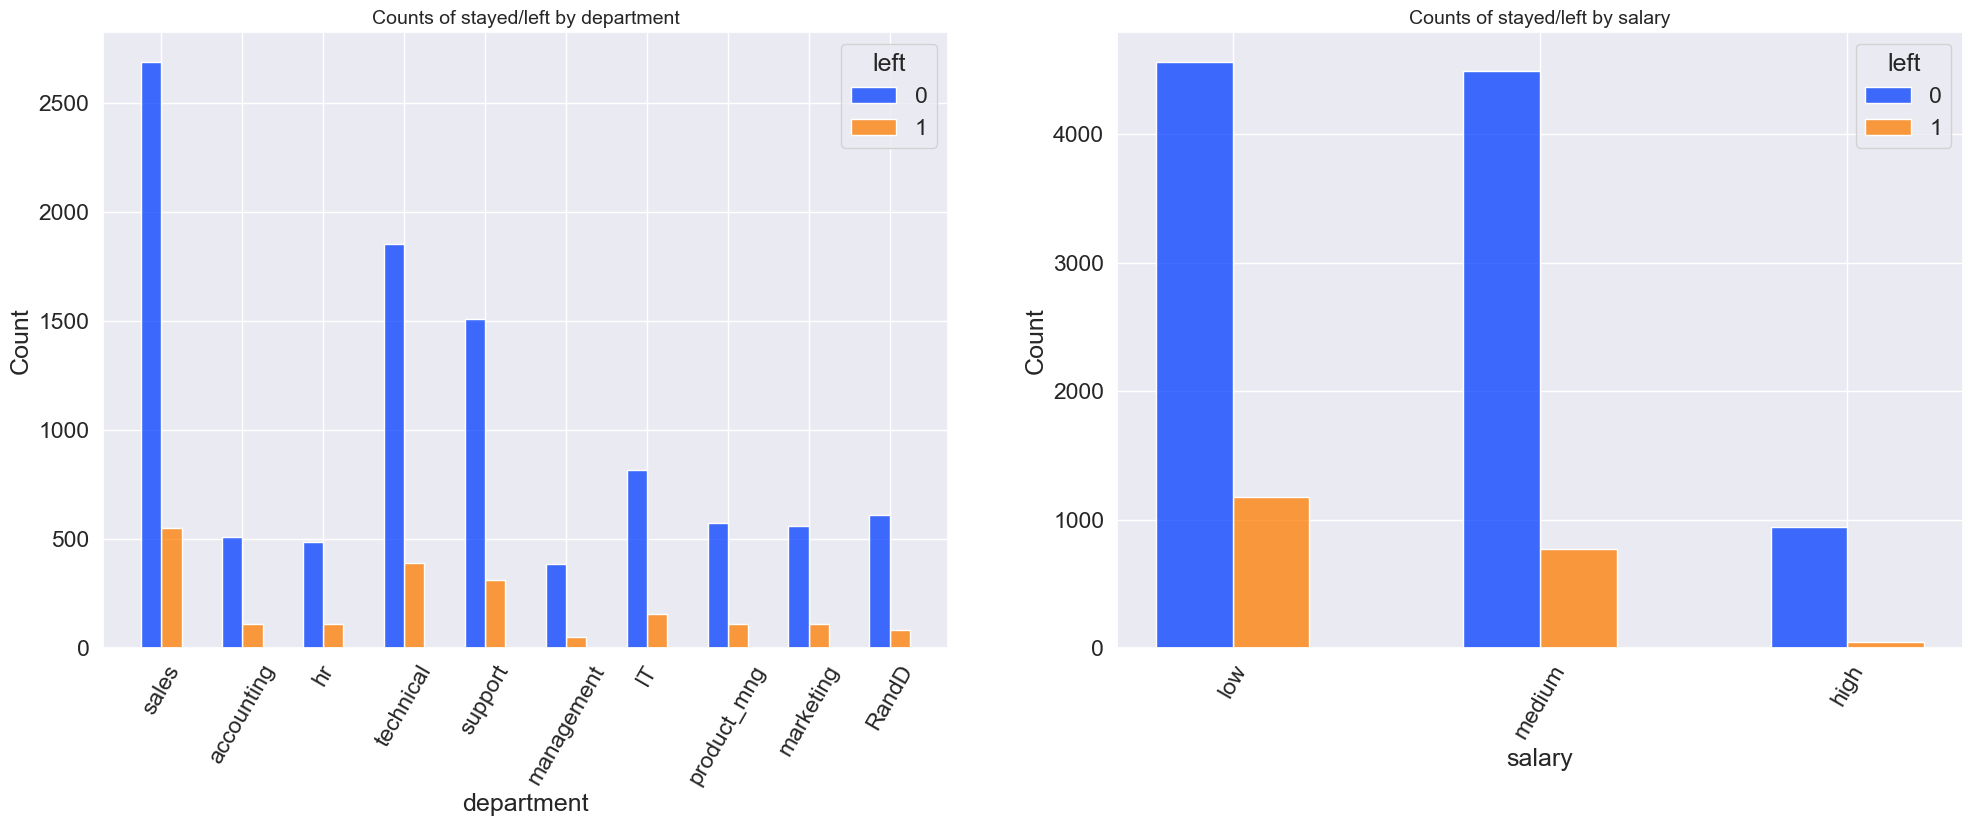

In [16]:
# Categorical columns

plt.figure(figsize=(24, 8))
sns.set(font_scale=1.5)
sns.set_palette("bright")
i = 1
for cate in cate_cols:
    plt.subplot(1, 2, i)
    sns.histplot(data=df_v1, x=cate, hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
    plt.tick_params(axis='x', rotation = 60)
    plt.title(f'Counts of stayed/left by {cate}', fontsize=14)
    i+=1

-> Inspect attribute "term" that maybe have ouliters of data.

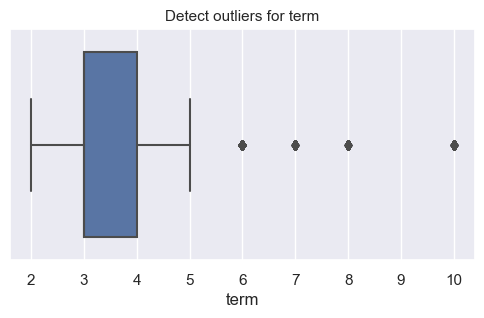

In [17]:
# Term 
plt.figure(figsize = (6, 3))
sns.set(font_scale=1)
plt.title('Detect outliers for term', fontsize = 11)
sns.boxplot(x = df_v1['term'])
plt.show()

In [18]:
# Compute the number of rows containing outliers

# Compute the 25th percentile value in `term`
percentile25_value = df_v1['term'].quantile(0.25)

# Compute the 75th percentile value in `term`
percentile75_value = df_v1['term'].quantile(0.75)

# Compute the interquartile range in `term`
iqr_value = percentile75_value - percentile25_value

# Define the upper limit and lower limit for non-outlier values in `term`
upper_limit_value = percentile75_value + 1.5 * iqr_value
lower_limit_value = percentile25_value - 1.5 * iqr_value

print(f"Lower limit value: {lower_limit_value}")
print(f"Upper limit value: {upper_limit_value}")

# Identify subset of data containing outliers in `term`
outlier_rows = df_v1[(df_v1['term'] > upper_limit_value) | (df_v1['term'] < lower_limit_value)]

# Count rows in the data containing outliers in `term`
print("Number of rows in the data containing outliers in `term`:", len(outlier_rows))

Lower limit value: 1.5
Upper limit value: 5.5
Number of rows in the data containing outliers in `term`: 824


-> Some types of my models are more sensitive to outliers than others. When I get to the stage of building my model, I will consider whether to remove outliers based on the type of model I decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Numbers of people who left vs stayed
num_left_stay = df_v1['left'].value_counts()
print(f'Numbers of people: \n Stayed: {num_left_stay[0]}\n Left: {num_left_stay[1]} \n')

# Percentages of people who left vs stayed
percen_left_stay = df_v1['left'].value_counts(normalize=True)*100
print(f'Percentages of people: \n Stayed: {round(percen_left_stay[0], 2)}%\n Left: {round(percen_left_stay[1], 2)}%')

Numbers of people: 
 Stayed: 10000
 Left: 1991 

Percentages of people: 
 Stayed: 83.4%
 Left: 16.6%


### Data visualizations

Now, create plots to visualize relationships between variables in the data.

Create a stacked boxplot showing `average_monthly_hours` distributions for `number_project`, comparing the distributions of employees who stayed versus those who left.

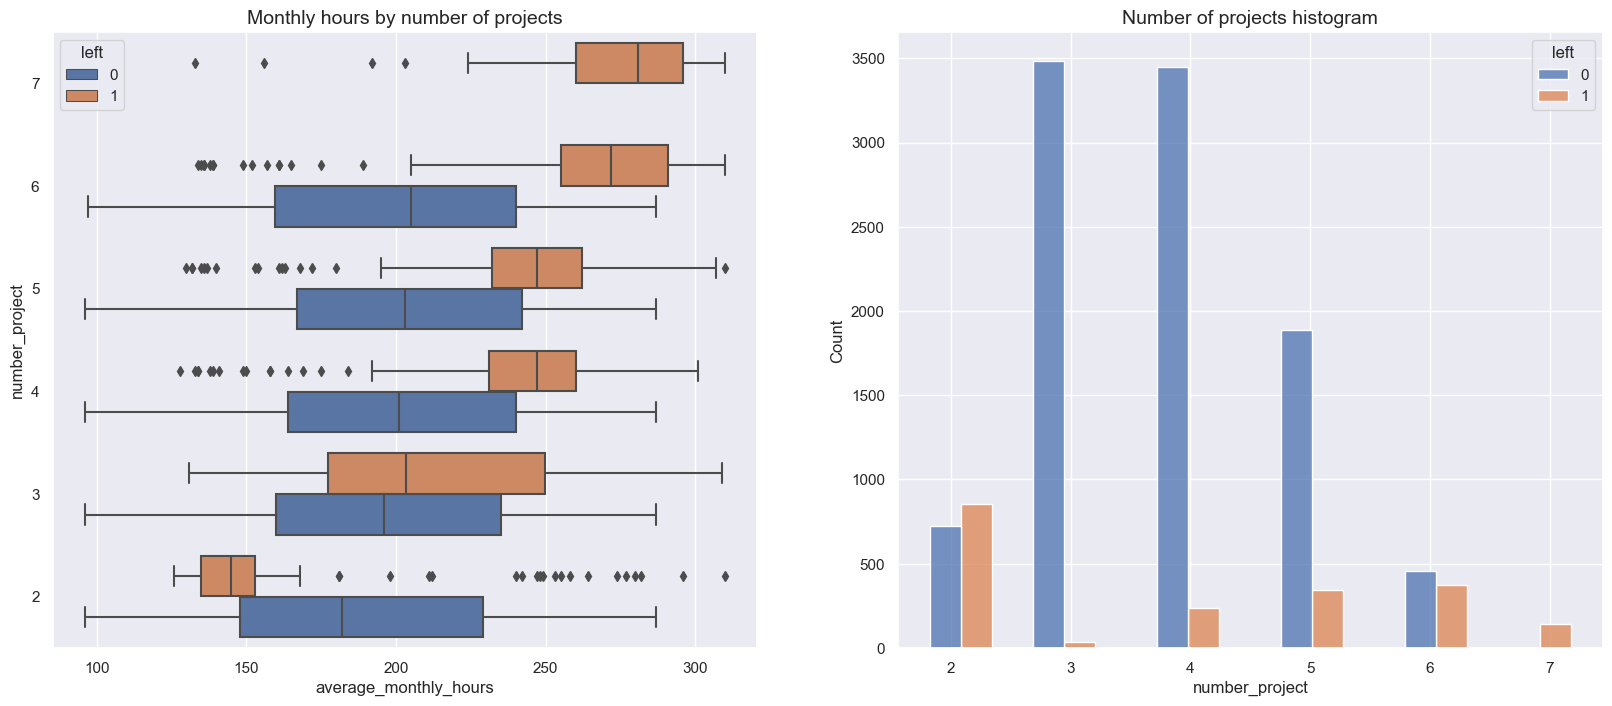

In [20]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (20,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`
sns.boxplot(data=df_v1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize = '14')

# Create histogram showing distribution of `number_project`
# employ_stay = df_v1.loc[df_v1['left']==0, 'number_project']
# employ_left = df_v1.loc[df_v1['left']==1, 'number_project']
sns.histplot(data = df_v1, x = 'number_project', hue = 'left', multiple = 'dodge', shrink = 3, ax = ax[1])
ax[1].set_title('Number of projects histogram', fontsize = '14')
plt.show()

It's likely that employees who handle more projects also spend more hours working. This pattern seems evident here, as the average monthly hours increase with the number of projects. However, some noteworthy observations emerge from this analysis:

1. There are two distinct groups of departed employees: (A) those who worked notably fewer hours compared to their peers with the same project count, and (B) those who worked significantly more. Group A may have been terminated or possibly had already resigned, resulting in reduced work hours. In contrast, Group B likely resigned voluntarily, possibly due to their significant contributions to projects, making their departure impactful.

2. Employees assigned to seven projects all left the company, and their monthly working hours fell within a narrow range, notably higher than other groups.

3. The optimal project workload appears to be between three to four projects, as indicated by the low left-to-stayed ratio within these cohorts.

4. Assuming a 40-hour workweek and two weeks of annual leave, employees working Monday through Friday would average around `166.67 hours per month` (`50 weeks * 40 hours per week / 12 months`). However, most groups, including those who stayed, worked significantly beyond this threshold, suggesting a potential issue of overwork across the board.

In [21]:
# Count of stayed/left for employees with 7 projects
df_v1.loc[df_v1['number_project']==7, 'left'].value_counts()

left
1    145
Name: count, dtype: int64

-> Employees assigned to seven projects all left the company.

**Examine the average monthly hours versus the satisfaction levels.**

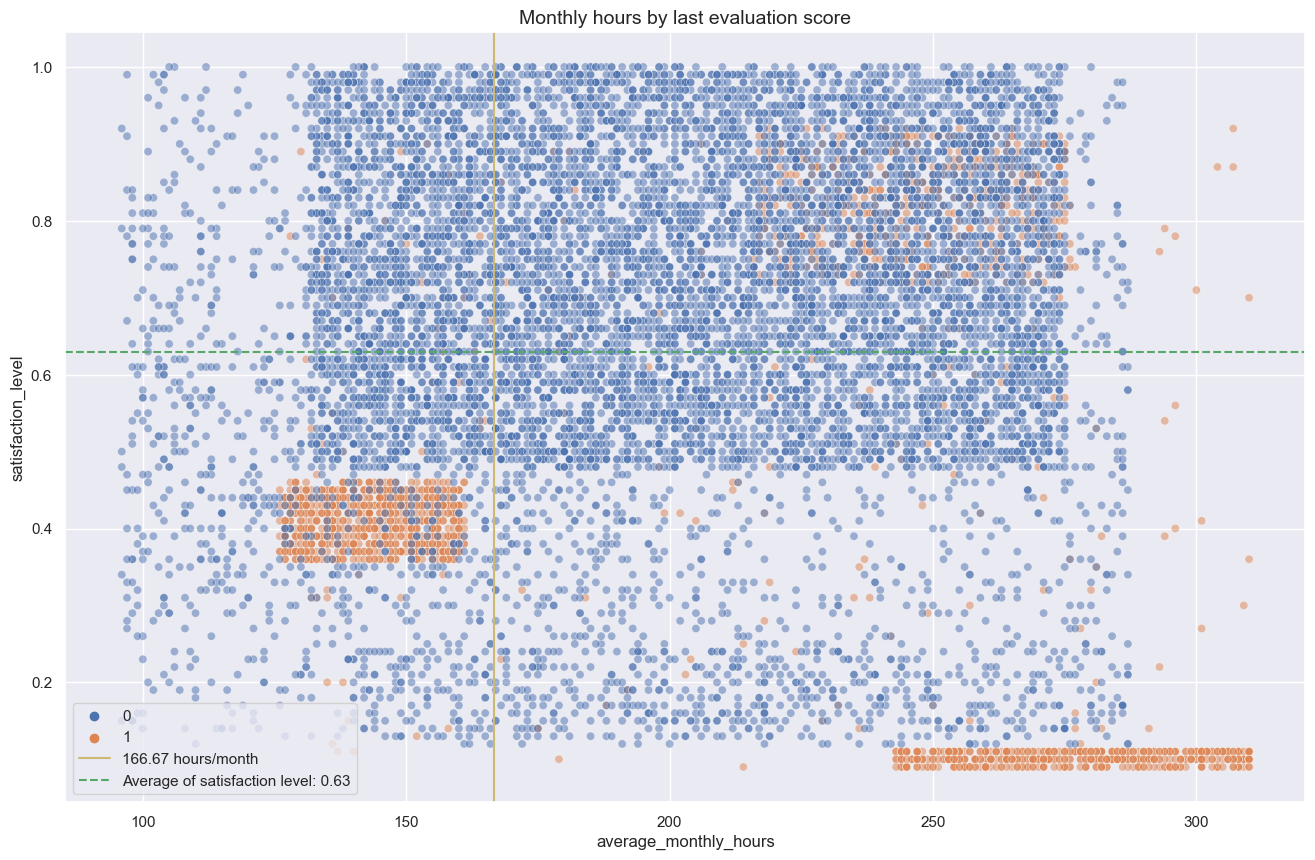

In [22]:
# Create scatterplot of `average_monthly_hours` vs `satisfaction_level`, comparing employees 
# who stayed/ left
ave_sat = round(df_v1['satisfaction_level'].mean(), 2)
plt.figure(figsize=(16, 10))
sns.scatterplot(data = df_v1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.5)
plt.axvline(x = 166.67, color = 'y', label = '166.67 hours/month', ls = '-')
plt.axhline(y = ave_sat, color = 'g', label = f'Average of satisfaction level: {ave_sat}', ls = '--')
plt.legend()
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

- The scatterplot above indicates a significant group of employees who worked approximately ~240–320 hours per month. This is likely linked to their satisfaction levels being nearly zero.

- The plot also reveals another departing group, those with more standard working hours. Nevertheless, their satisfaction levels were only around 0.4. Speculating on their reasons for leaving is challenging. They might have felt pressured to work longer hours, considering many of their colleagues did. This pressure could have diminished their satisfaction levels.


**Visualize satisfaction levels by term.**

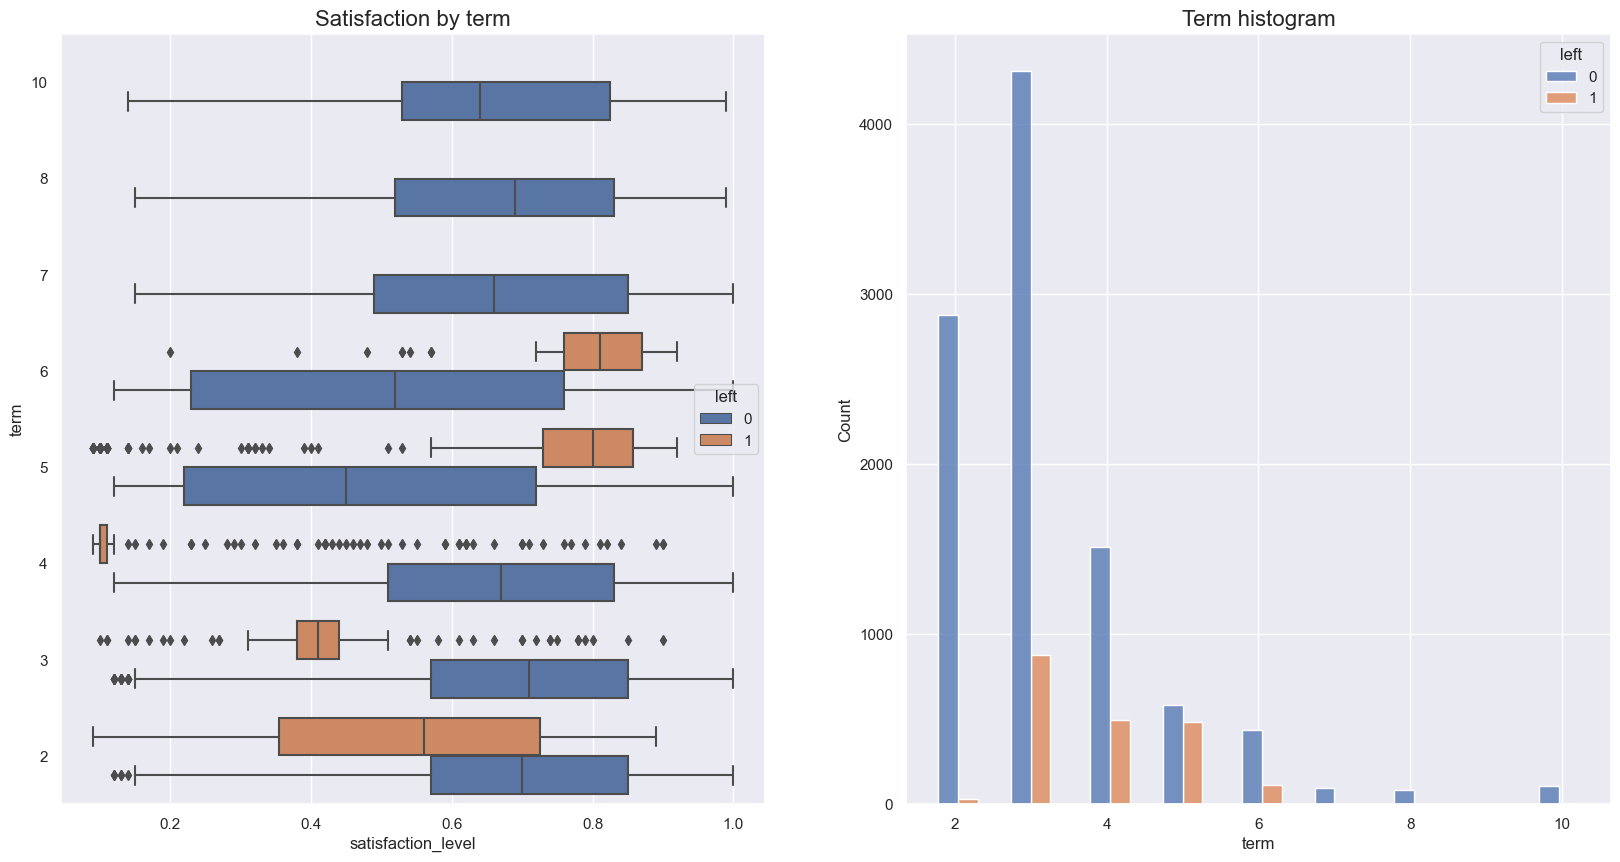

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

sns.boxplot(data=df_v1, x='satisfaction_level', y='term', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by term', fontsize='16')

sns.histplot(data=df_v1, x='term', hue='left', multiple='dodge', shrink=6, ax=ax[1])
ax[1].set_title('Term histogram', fontsize='16')
plt.show()

- Departed employees can be classified into two main groups: dissatisfied individuals with shorter employment terms and highly satisfied individuals with medium-length terms.
- Departed employees who had been with the company for four years exhibited an unusually low satisfaction level. It's worth investigating any changes in company policies that may have impacted individuals at this specific term point.
- Employees with the longest terms did not leave, and their satisfaction levels resembled those of newer employees who remained.
- The histogram indicates a scarcity of employees with longer terms, possibly indicating that they are higher-ranking, higher-paid individuals.

In [24]:
df_v1.pivot_table(index='left', values='satisfaction_level', aggfunc=[np.median, np.mean])

median               mean
     satisfaction_level satisfaction_level
left                                      
0                  0.69           0.667365
1                  0.41           0.440271

-> As anticipated, satisfaction scores for departing employees are lower than those for staying ones. Interestingly, among the staying employees, the mean satisfaction score is slightly below the median, suggesting a left-skewed distribution of satisfaction levels among them.

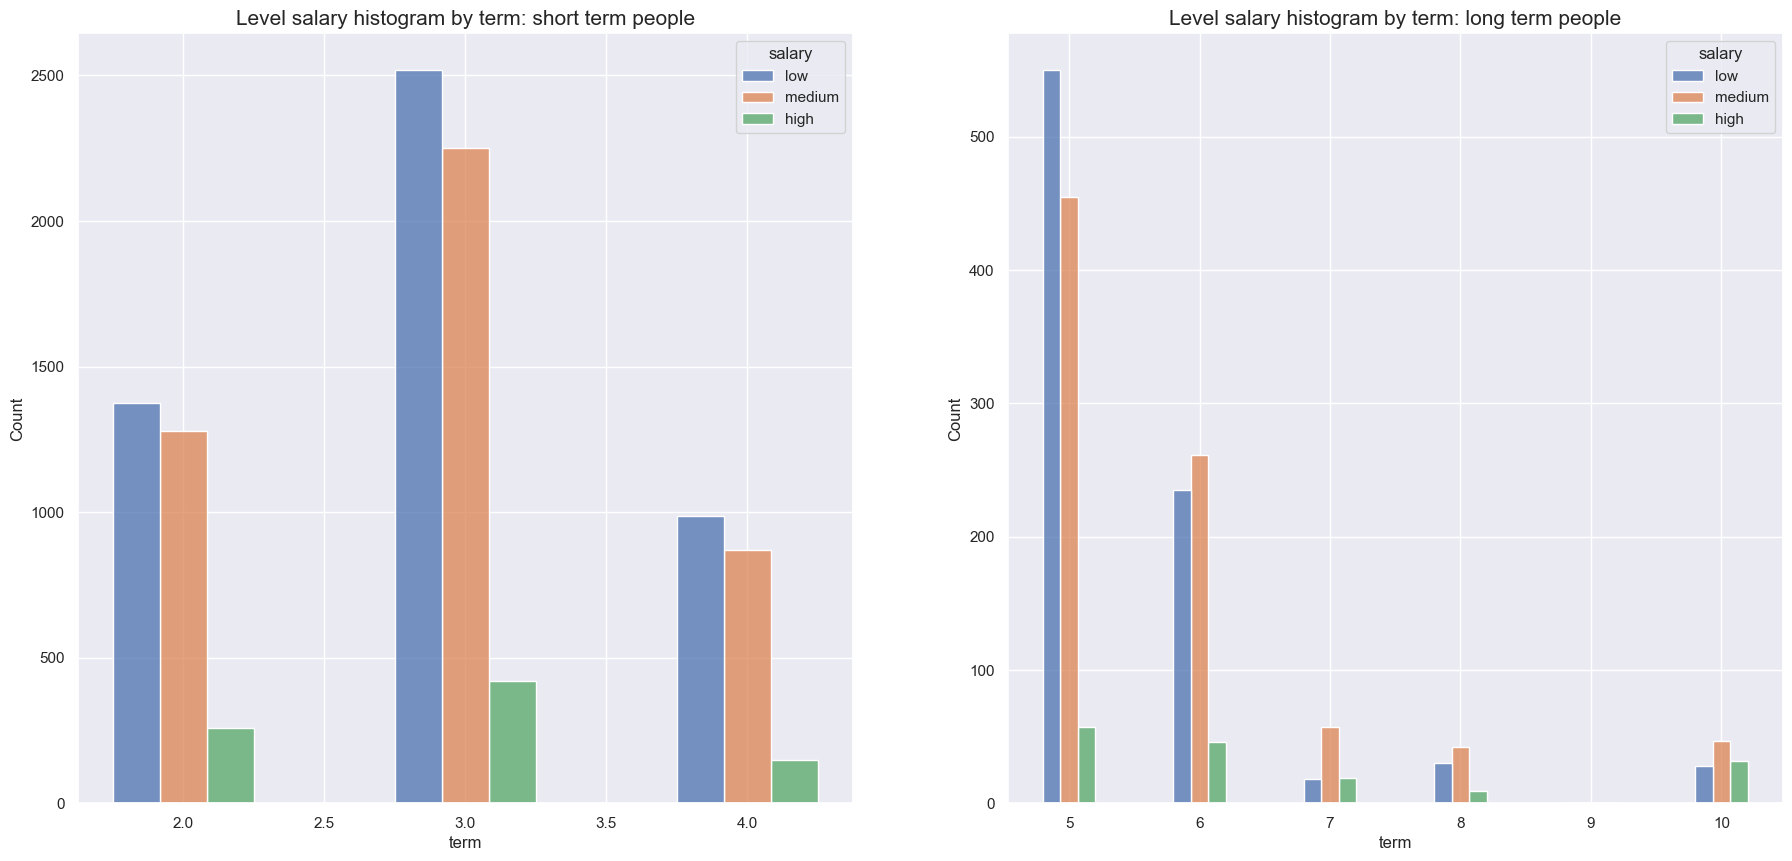

In [25]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,10))

# Define short-term employees (assume < 5 years)
short_term = df_v1[df_v1['term'] < 5]

# Define long-term employees (assume >= 5 years)
long_term = df_v1[df_v1['term'] >= 5]
sns.histplot(data=short_term, x='term', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Level salary histogram by term: short term people', fontsize='15')


sns.histplot(data=long_term, x='term', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Level salary histogram by term: long term people', fontsize='15')
plt.show()

-> The plots indicate that longer-tenured employees did not disproportionately consist of higher-paid individuals.

**Correlation between working long hours and receiving high evaluation scores.**

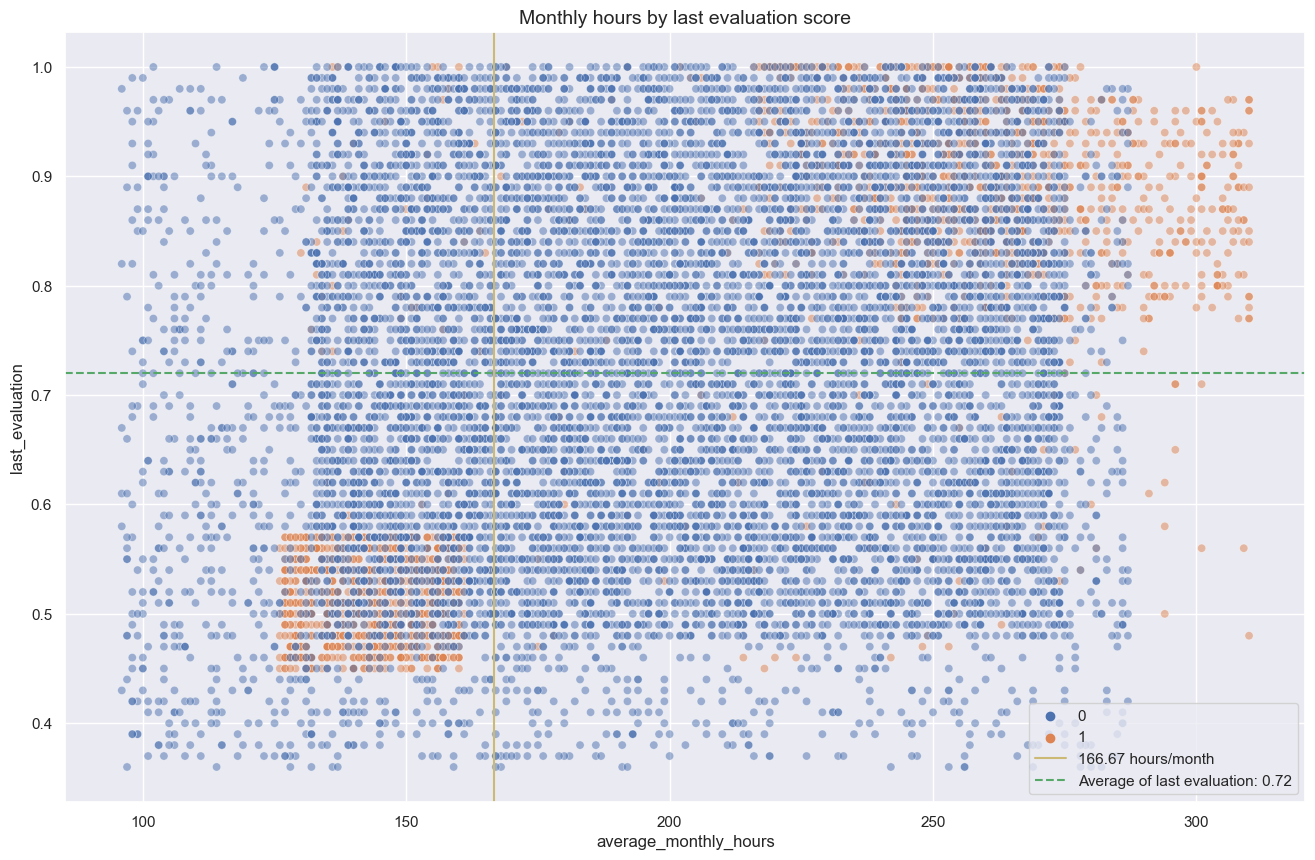

In [26]:
ave_last_eval = round(df_v1['last_evaluation'].mean(), 2)
plt.figure(figsize=(16, 10))
sns.scatterplot(data = df_v1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.5)
plt.axvline(x = 166.67, color = 'y', label = '166.67 hours/month', ls = '-')
plt.axhline(y = ave_last_eval, color = 'g', label = f'Average of last evaluation: {ave_last_eval}', ls = '--')
plt.legend()
plt.title('Monthly hours by last evaluation score', fontsize='14')
plt.show()

- Two groups of departing employees are evident: those who were overworked but performed well, and those who worked slightly below the monthly average of 166.67 hours with lower evaluation scores.
- A correlation between hours worked and evaluation score is apparent.
- The upper left quadrant of the plot doesn't have a high percentage of employees, indicating that working long hours doesn't necessarily result in a good evaluation score.
- Most employees in this company work well over 167 hours per month.

**Whether employees who worked very long hours were promoted in the last five years.**

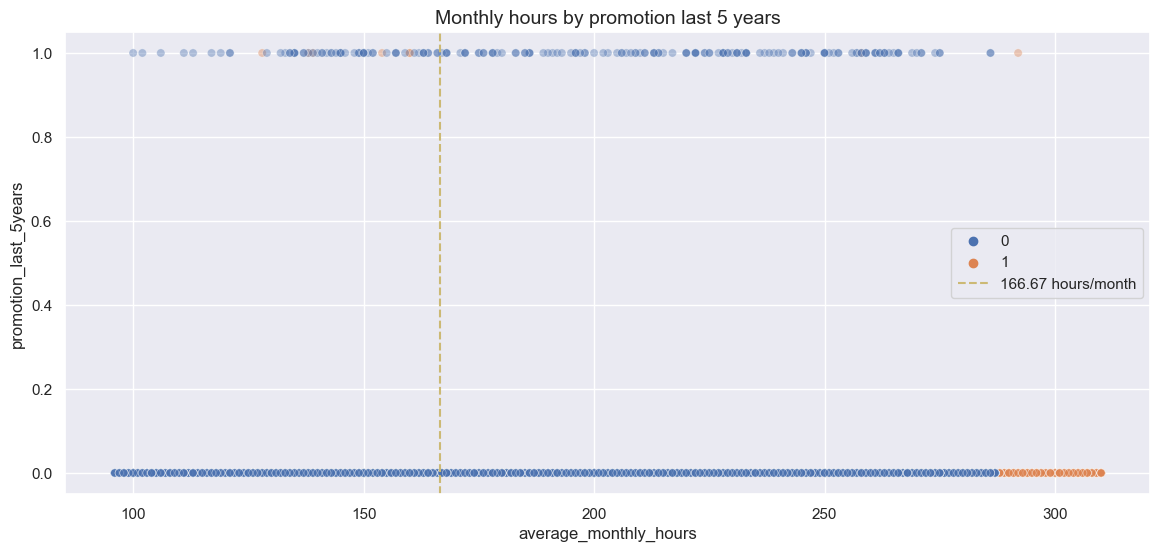

In [27]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_v1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x = 166.67, color = 'y', label = '166.67 hours/month', ls = '--')
plt.legend()
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- Very few employees who were promoted in the last five years left.
- Very few employees who worked the most hours were promoted.
- All of the employees who left were working the longest hours.

**Check for strong correlations between variables in the data.**

In [28]:
numeric_cols

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'term', 'work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [29]:
cate_cols

Index(['department', 'salary'], dtype='object')

In [30]:
df_v1[numeric_cols].corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_monthly_hours           -0.006252         0.264678        0.331516   
term                            -0.152915         0.096829        0.188837   
work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   

                       average_monthly_hours      term  work_accident  \
satisfaction_level                 -0.006252 -0.152915       0.039940   
last_evaluation                     0.264678  0.096829      -0.005695   
number_project                      0.331516  0.188837      -0.005612   
average_monthly_hours               1.000000  0.102875      -0.012860   
term                                0.102875  1.000000       0.000003   
work_accident                      -0.012860  0.000003       1.000000   
left                                0.070409  0.173295      -0.125436   
promotion_last_5years              -0.004964  0.056828       0.029852   

                           left  promotion_last_5years  
satisfaction_level    -0.350558               0.019789  
last_evaluation        0.013520              -0.007206  
number_project         0.030928              -0.000544  
average_monthly_hours  0.070409              -0.004964  
term                   0.173295               0.056828  
work_accident         -0.125436               0.029852  
left                   1.000000              -0.044657  
promotion_last_5years -0.044657               1.000000

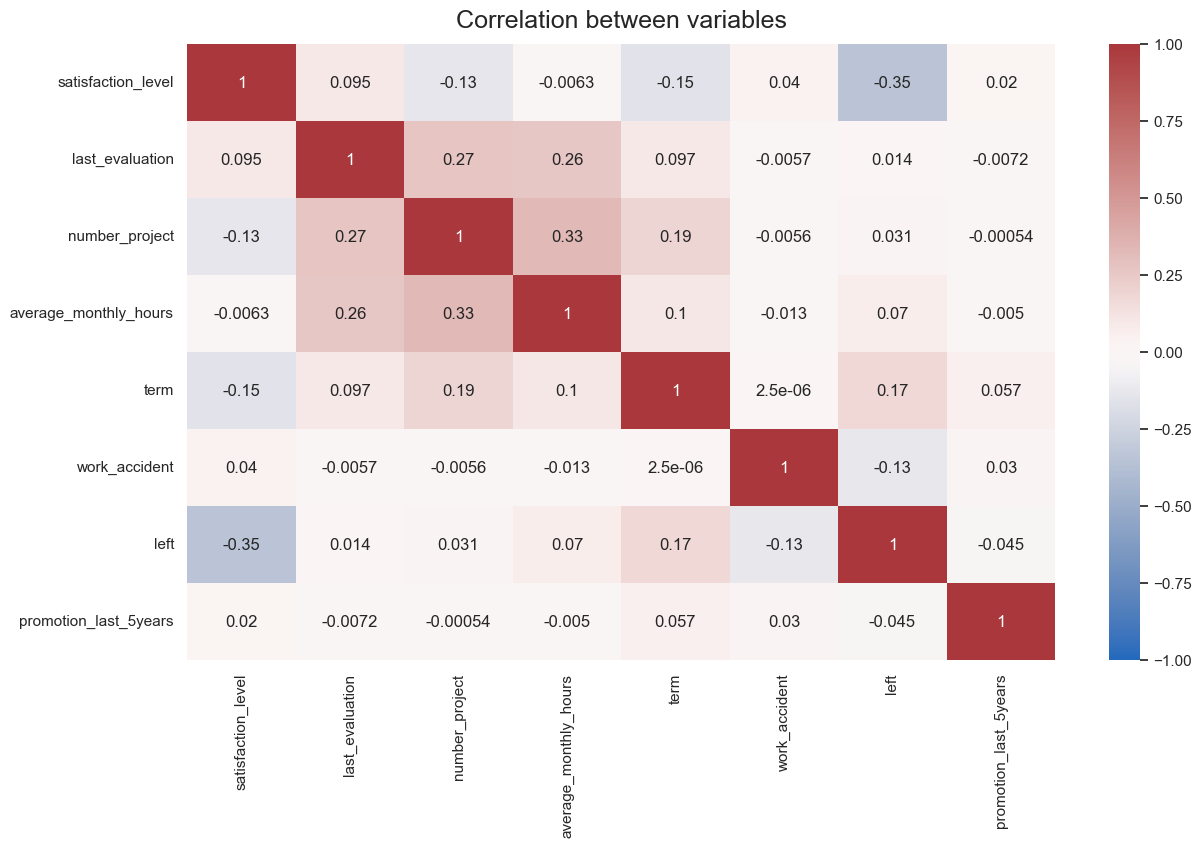

In [31]:
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(df_v1[numeric_cols].corr(), vmin=-1, vmax=1, annot=True, 
                      cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation between variables', fontdict={'fontsize':18}, pad=12);

-> The correlation heatmap reveals that the number of projects, monthly hours, and evaluation scores are positively correlated with each other, while employee satisfaction is negatively correlated with their likelihood of leaving the company.

### Insights

It appears that the high employee turnover rate is a consequence of poor management practices. Employees who leave the company often cite long working hours, multiple projects, and generally low levels of satisfaction as reasons for their departure. Working long hours without receiving promotions or good performance evaluations can be demoralizing for employees. There is a significant group of employees at this company who are likely experiencing burnout. Additionally, it seems that employees who have been with the company for more than six years are more likely to stay.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave). 

### Identify the types of models most appropriate for this task.

Since the variable we want to predict (whether an employee leaves the company) is categorical, we could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling Approach with Solution 1: Logistic Regression Model

#### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [32]:
df_v2 = df_v1.copy()

# Encode the `salary` column as an ordinal numeric category [0, 1, 2]
df_v2['salary'] = (df_v2['salary'].astype('category')
                   .cat.set_categories(['low', 'medium', 'high']).cat.codes)

# Dummy encode the `department` column
df_v2 = pd.get_dummies(df_v2, drop_first=False)

# Display the new dataframe
df_v2.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   term  work_accident  left  promotion_last_5years  salary  department_IT  \
0     3              0     1                      0       0          False   
1     6              0     1                      0       1          False   
2     4              0     1                      0       1          False   
3     5              0     1                      0       0          False   
4     3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Create a heatmap to visualize how correlated variables are. Consider variables: `satisfaction_level`, `last_evaluation`, `number_project`, `average_monthly_hours`, `term` and `left`.

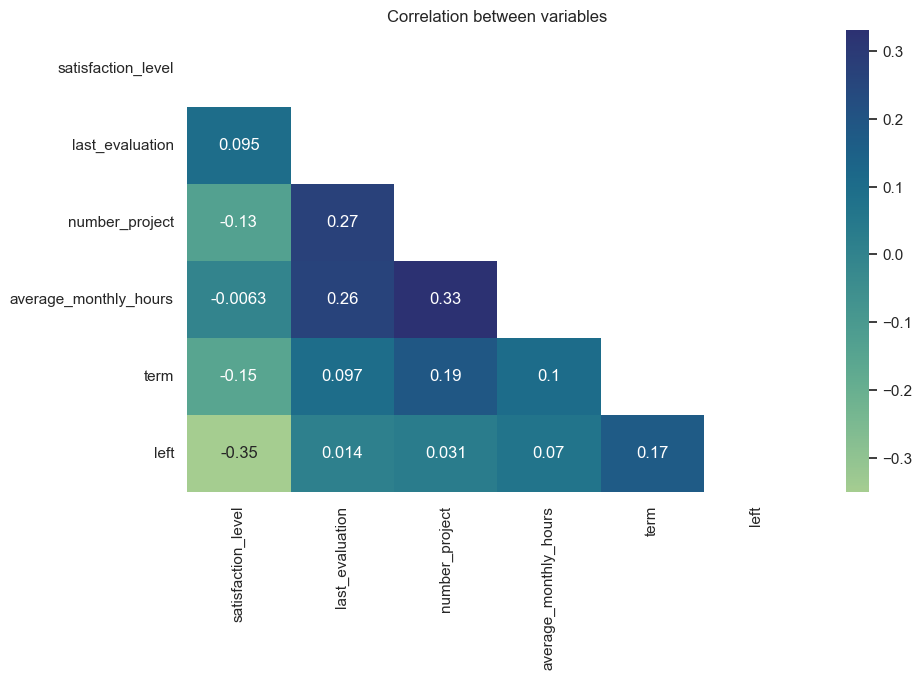

In [33]:
# Create a heatmap to visualize how correlated variables are
consider_attr = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'term', 'left'] 
consider_corr = df_v2[consider_attr].corr()
plt.figure(figsize=(10, 6))
sns.set_palette("bright")
sns.set_style("white")
masks = np.zeros_like(consider_corr)
masks[np.triu_indices_from(masks)] = True
sns.heatmap(consider_corr, annot = True, mask = masks, cmap = "crest")
plt.title('Correlation between variables')
plt.show()

Because logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `term` column that were identified earlier (**Analyze Stage**).

In [34]:
# Filter all the data that exclude outliers
df_lr = df_v2.loc[(df_v2['term'] >= lower_limit_value) & (df_v2['term'] <= upper_limit_value)]
df_lr = df_lr.reset_index(drop=True)
df_lr.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.11             0.88               7                    272   
2                0.72             0.87               5                    223   
3                0.37             0.52               2                    159   
4                0.41             0.50               2                    153   

   term  work_accident  left  promotion_last_5years  salary  department_IT  \
0     3              0     1                      0       0          False   
1     4              0     1                      0       1          False   
2     5              0     1                      0       0          False   
3     3              0     1                      0       0          False   
4     3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [35]:
df_lr.shape

(11167, 19)

Prepare data for model.

In [36]:
df_train, df_test = train_test_split(df_lr, test_size = 0.2, stratify = df_lr['left'], random_state = 10)

X_train = df_train.copy()
y_train = X_train.pop("left")

X_test = df_test.copy()
y_test = X_test.pop("left")

Construct model.

In [37]:
# max_iter (430) is the approximate minimum number of iterations for the algorithm to converge.
lr = LogisticRegression(random_state = 10, max_iter = 430)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=430, random_state=10)

In [38]:
train_pred = lr.predict(X_train)

Evaluate model on train set.

In [39]:
target_labels = ['Predicted "Not leave"', 'Predicted "Leave"']
print(classification_report(train_pred, y_train, target_names = target_labels))

                       precision    recall  f1-score   support

Predicted "Not leave"       0.94      0.86      0.90      8150
    Predicted "Leave"       0.24      0.45      0.31       783

             accuracy                           0.82      8933
            macro avg       0.59      0.66      0.60      8933
         weighted avg       0.88      0.82      0.85      8933



Evaluate model on test set.

In [40]:
# Predict test data
y_pred = lr.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model. 

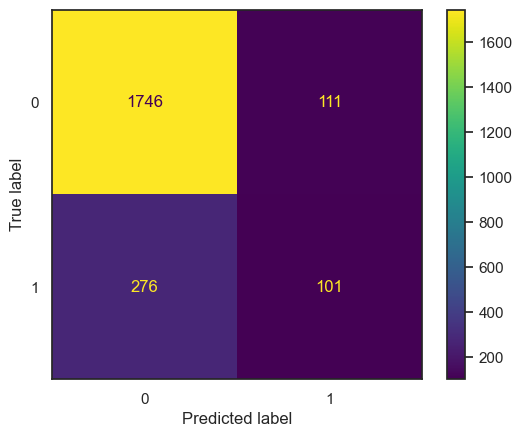

In [41]:
# Compute values for confusion matrix
confusion_arr = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Create display of confusion matrix
con_arr_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_arr, display_labels=lr.classes_)

# Plot confusion matrix
con_arr_disp.plot(values_format='')

# Display plot
plt.show()

About confusion matrix:
- `Upper-left quadrant`: True negatives (accurately predicted did not leave).

- `Upper-right quadrant`: False positives (inaccurately predicted as leaving).

- `Bottom-left quadrant`: False negatives (inaccurately predicted did not leave).

- `Bottom-right quadrant`: True positives (accurately predicted as leaving).

- `True negatives`: Did not leave, accurately predicted.

- `False positives`: Did not leave, inaccurately predicted as leaving.

- `False negatives`: Left, inaccurately predicted did not leave.

- `True positives`: Left, accurately predicted.

-> **Perfect model**: All true negatives and true positives, no false negatives or false positives.

Check the class balance in the `left` column to understand the value counts. In binary classification, class balance affects the interpretation of accuracy metrics.

In [42]:
df_lr['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

The data has an approximately 83%-17% split, which is not perfectly balanced but not too imbalanced either. Therefore, I can use this data without modifying the class balance and continue evaluating the model.

Create a classification report with `precision`, `recall`, `f1-score`, and `accuracy` metrics to evaluate the logistic regression model's performance.

In [43]:
target_labels = ['Predicted "Not leave"', 'Predicted "Leave"']
print(classification_report(y_test, y_pred, target_names = target_labels))

                       precision    recall  f1-score   support

Predicted "Not leave"       0.86      0.94      0.90      1857
    Predicted "Leave"       0.48      0.27      0.34       377

             accuracy                           0.83      2234
            macro avg       0.67      0.60      0.62      2234
         weighted avg       0.80      0.83      0.81      2234



The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 81% (all weighted averages), and accuracy of 83%. However, if it's most important to predict employees who leave, then the scores are significantly lower (with `marco avg`, f1-score is just 62%).

### Modeling Approach with Solution 2: Tree-based Model
This solution will cover implementation of *Decision Tree* and *Random Forest* algorithm. 

Because I have handled and split the data in the previous solution (Solution 1), I will reuse it in this solution.

Now, check our data.

In [44]:
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape} \n \
      y_train shape: {y_train.shape}, y_test shape: {y_test.shape}')

X_train shape: (8933, 18), X_test shape: (2234, 18) 
       y_train shape: (8933,), y_test shape: (2234,)


#### Decision tree - Phase 1

Create a decision tree model and implement cross-validated grid search to exhaustively search for the optimal model parameters.

In [45]:
# Init model
dc_tree = DecisionTreeClassifier(random_state=10)

# Define hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8],
             'min_samples_leaf': [2, 4, 6],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics to capture
scores = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Init GridSearch
hyper_tree = GridSearchCV(dc_tree, cv_params, scoring = scores, cv = 4, refit='roc_auc')

In [46]:
# %%time
hyper_tree.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [47]:
print(hyper_tree)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))


Best parameters for model.

In [48]:
# Check best parameters
hyper_tree.best_params_

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

AUC score on training set.

In [49]:
hyper_tree.best_score_

0.9756114941563813

In [50]:
def get_result_from_metrics(model_name, model_object, metric):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

def get_scores(model_name, model, X_test_data, y_test_data):
    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [51]:
# Get all CV scores
dc_tree_rs = get_result_from_metrics('Decision Tree GS + CV', hyper_tree, 'auc')
dc_tree_rs

model  precision    recall        F1  accuracy       auc
0  Decision Tree GS + CV   0.959107  0.918931  0.938572  0.979738  0.975611

In [52]:
# Predict test data
dc_tree_test = get_scores('Decision Tree GS + CV', hyper_tree, X_test, y_test)
dc_tree_test

model  precision    recall        f1  accuracy       auc
0  Decision Tree GS + CV   0.961326  0.923077  0.941813  0.980752  0.957769

The decision tree model performs well, indicated by similar scores between validation and test sets, instilling confidence in its strength. However, decision trees may overfit, whereas random forests, using multiple trees, alleviate this issue. It's advisable to explore building a random forest model next.


#### Random forest - Round 1

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [53]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, 7], 
             'max_features': [1.0],
             'max_samples': [0.4, 0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 450],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [54]:
# rf1.fit(X_train, y_train)

In [55]:
# Storage and load model
def save_model(path, model_object, model_saved):
    with open(path + model_saved + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def load_model(path, saved_model_name):
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [56]:
# Sometime, it consumes to much time to train a model, so saving model after training is a good idea to reuse
model_path = './Model/'

In [57]:
# Save model
# save_model(model_path, rf1, 'rf1_p1')

In [58]:
# Load model
rf1 = load_model(model_path, 'rf1_p1')

Identify the best AUC score achieved by the random forest model on the training set.

In [59]:
# Check best AUC score on CV
rf1.best_score_

0.982763662791749

Identify the optimal values for the parameters of the random forest model.

In [60]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [61]:
# Get all CV scores
rf1_cv_results = get_result_from_metrics('Random forest GS + CV', rf1, 'auc')
print(dc_tree_rs)
print(rf1_cv_results)

                   model  precision    recall        F1  accuracy       auc
0  Decision Tree GS + CV   0.959107  0.918931  0.938572  0.979738  0.975611
                   model  precision    recall        F1  accuracy       auc
0  Random forest GS + CV   0.970748  0.922916  0.946137  0.982313  0.982764


The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model mostly outperforms the decision tree model.

Use the best performing model to predict on the test set.

In [62]:
# Get predictions on test data
rf1_test = get_scores('Random forest GS + CV', rf1, X_test, y_test)
rf1_test

model  precision    recall        f1  accuracy      auc
0  Random forest GS + CV   0.966851  0.928382  0.947226  0.982543  0.96096

-> The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, it's more confident that model's performance on this data is representative of how it will perform on new, unseeen data.

#### Feature Engineering

It might be skeptical of the high evaluation scores due to potential data leakage. Data leakage occurs when training data improperly includes information that would not be available during model deployment, leading to unrealistically high scores that can't be replicated in production.

For instance, the company might not have satisfaction levels reported for all employees, and the `average_monthly_hours` could be a source of leakage. Employees who have decided to quit or have been marked for termination might work fewer hours, influencing the model's accuracy unfairly.

Initially, decision tree and random forest models used all variables as features. To improve the models, we will incorporate feature engineering. Specifically, we will drop `satisfaction_level` and create a new binary feature called `over_time` to indicate whether an employee is overworked.

Drop `satisfaction_level` and create a new feature that roughly captures whether an employee is overworked. Then call this new feature `over_time`. It will be a binary variable.

In [63]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df_v3 = df_lr.drop('satisfaction_level', axis=1)

# Display new data
df_v3.head()

last_evaluation  number_project  average_monthly_hours  term  \
0             0.53               2                    157     3   
1             0.88               7                    272     4   
2             0.87               5                    223     5   
3             0.52               2                    159     3   
4             0.50               2                    153     3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0          False   
1              0     1                      0       1          False   
2              0     1                      0       0          False   
3              0     1                      0       0          False   
4              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

Define being over time as working more than 180 hours per month on average.

To make the `over_time` column binary, reassign the column using a boolean mask.
- `df_v3['over_time'] > 180` creates a series of booleans, consisting of `True` for every value > 180 and `False` for every values ≤ 180.

- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [64]:
# Create `over_time` column
df_v3['over_time'] = df_v3['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df_v3['over_time'].max())
print('Min hours:', df_v3['over_time'].min())

# Define `over_time` as working > 180 hrs/week
df_v3['over_time'] = (df_v3['over_time'] > 180).astype(int)
df_v3['over_time'].head()

Max hours: 310
Min hours: 96


0    0
1    1
2    1
3    0
4    0
Name: over_time, dtype: int32

Drop the `average_monthly_hours` column.

In [65]:
# Drop the `average_monthly_hours` column
df_v3 = df_v3.drop('average_monthly_hours', axis=1)
df_v3.head()

last_evaluation  number_project  term  work_accident  left  \
0             0.53               2     3              0     1   
1             0.88               7     4              0     1   
2             0.87               5     5              0     1   
3             0.52               2     3              0     1   
4             0.50               2     3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       0          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  over_time  
0               False                 False          0  
1               False                 False          1  
2               False                 False          1  
3               False                 False          0  
4               False                 False          0

Prepare data for model.

In [66]:
y = df_v3['left']
X = df_v3.drop('left', axis=1)

# Train/test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=10)

In [67]:
# Init model
dc_tree = DecisionTreeClassifier(random_state = 10)

# Define hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8],
             'min_samples_leaf': [2, 4, 6],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics to capture
scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Init GridSearch
hyper_tree_2 = GridSearchCV(dc_tree, cv_params, scoring = scores, cv = 4, refit='roc_auc')

#### Decision tree - Phase 2

In [68]:
hyper_tree_2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [69]:
# Check best params
hyper_tree_2.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [70]:
# Check best AUC score on CV
hyper_tree_2.best_score_

0.9593331235803666

Check the other scores.

In [71]:
dc_tree2_rs = get_result_from_metrics('Decision Tree2 GS + CV', hyper_tree_2, 'auc')
print(dc_tree_rs)
print(dc_tree2_rs)

                   model  precision    recall        F1  accuracy       auc
0  Decision Tree GS + CV   0.959107  0.918931  0.938572  0.979738  0.975611
                    model  precision    recall        F1  accuracy       auc
0  Decision Tree2 GS + CV   0.890205  0.904317  0.896605  0.964737  0.959333


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

#### Random forest - Phase 2

In [72]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, 7], 
             'max_features': [1.0],
             'max_samples': [0.4, 0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 450],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [73]:
# rf2.fit(X_train, y_train)

In [74]:
# Save model
# save_model(model_path, rf2, 'rf2_p2')

In [75]:
# Load model
rf2 = load_model(model_path, 'rf2_p2')

In [76]:
# Check best params
rf2.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 450}

In [77]:
# Get all CV scores
rf2_cv_results = get_result_from_metrics('Random forest2 GS + CV', rf2, 'auc')
print(rf1_cv_results)
print(rf2_cv_results)

                   model  precision    recall        F1  accuracy       auc
0  Random forest GS + CV   0.970748  0.922916  0.946137  0.982313  0.982764
                    model  precision    recall        F1  accuracy       auc
0  Random forest2 GS + CV   0.911108  0.898333  0.904645  0.968096  0.969074


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score model on the test set.

In [78]:
# Get predictions on test data
rf2_test_scores = get_scores('Random forest2 GS + CV', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall        f1  accuracy       auc
0  Random forest2 GS + CV   0.914667  0.909814  0.912234  0.970457  0.946291

This seems to be a stable, well-performing final model. 

Plot a confusion matrix to visualize how well it predicts on the test set.

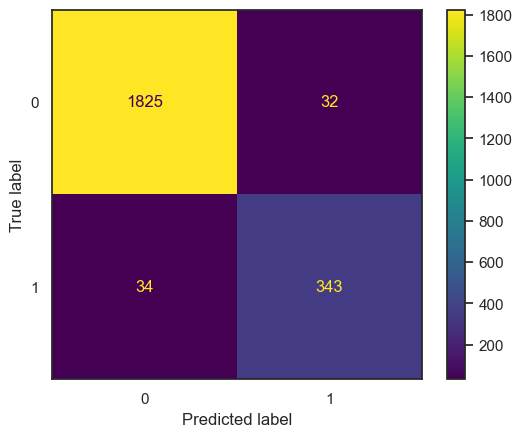

In [79]:
# Generate array of values for confusion matrix
y_preds = rf2.best_estimator_.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds, labels=rf2.classes_)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, meaning some employees are incorrectly identified as at risk of quitting or being fired. However, the model is still strong.

For further exploration, let's inspect the decision tree splits and the most important features in the random forest model.

#### Decision tree splits

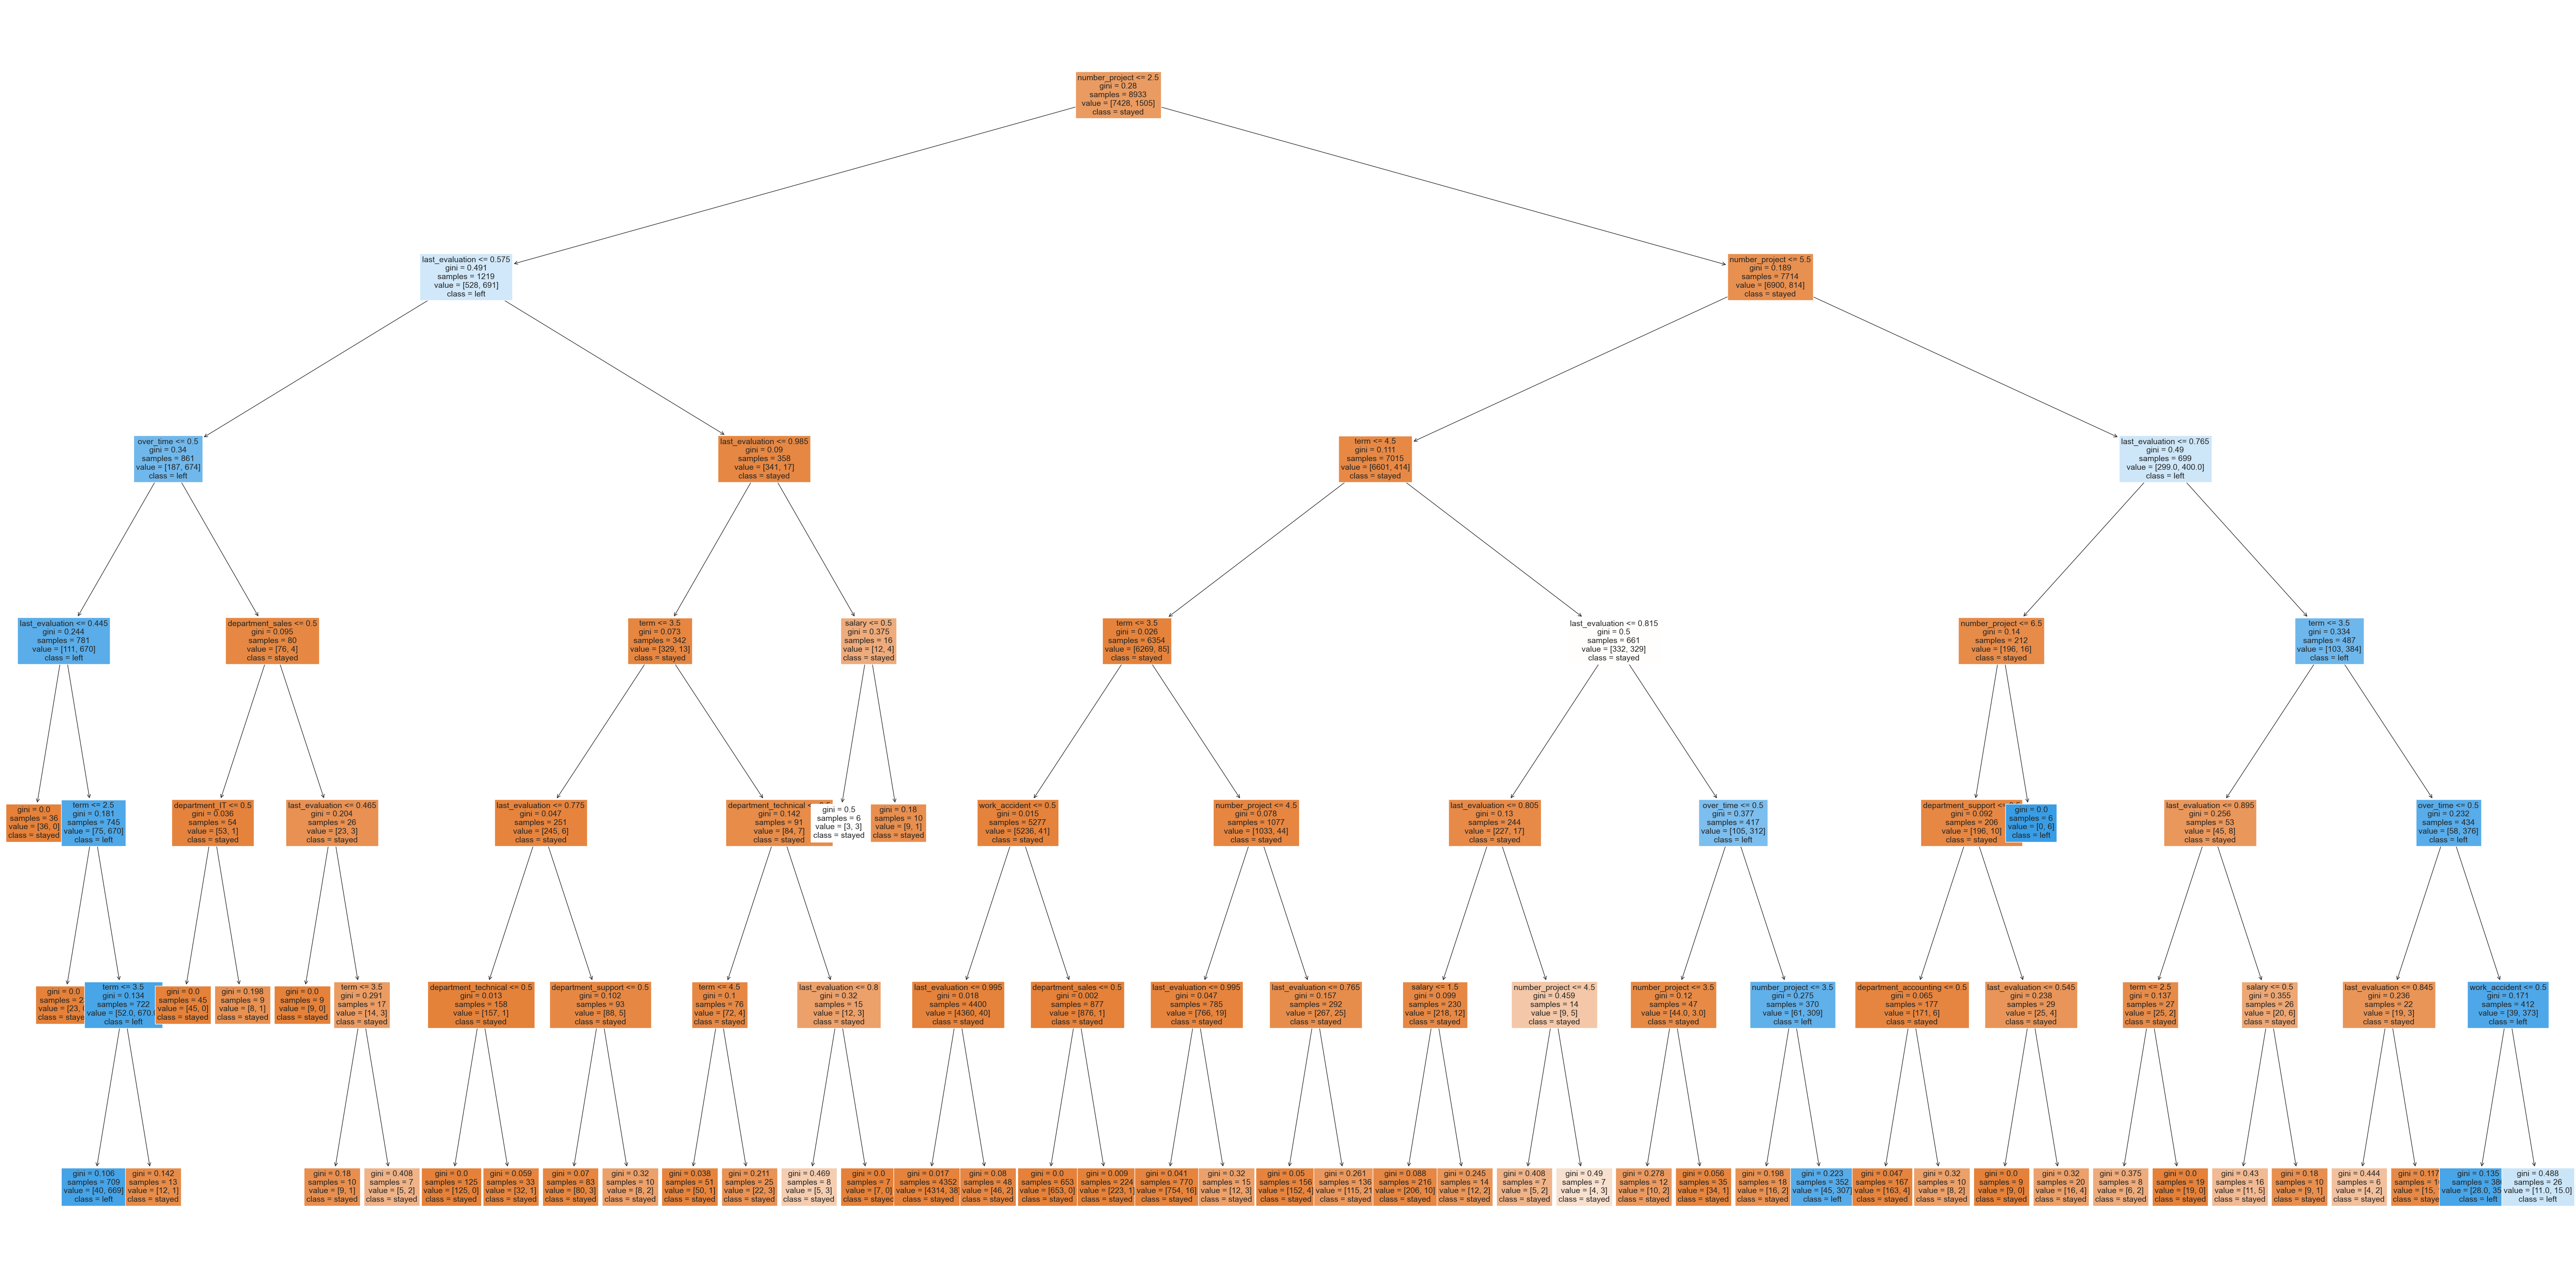

In [80]:
# Plot the tree
plt.figure(figsize=(80,40))
plot_tree(hyper_tree_2.best_estimator_, max_depth = 6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

#### Decision tree feature importance

In [81]:
tree2_features = pd.DataFrame(hyper_tree_2.best_estimator_.feature_importances_, 
                                 columns=['Gini importance'], 
                                 index=X.columns
                                )
tree2_features = tree2_features.sort_values(by='Gini importance', ascending=False)

# Only extract the features with importances > 0
tree2_features = tree2_features[tree2_features['Gini importance'] != 0]
tree2_features

Gini importance
number_project                0.404191
last_evaluation               0.313109
term                          0.193558
over_time                     0.083790
work_accident                 0.003013
salary                        0.000992
department_support            0.000505
department_technical          0.000293
department_accounting         0.000290
department_sales              0.000167
department_IT                 0.000092

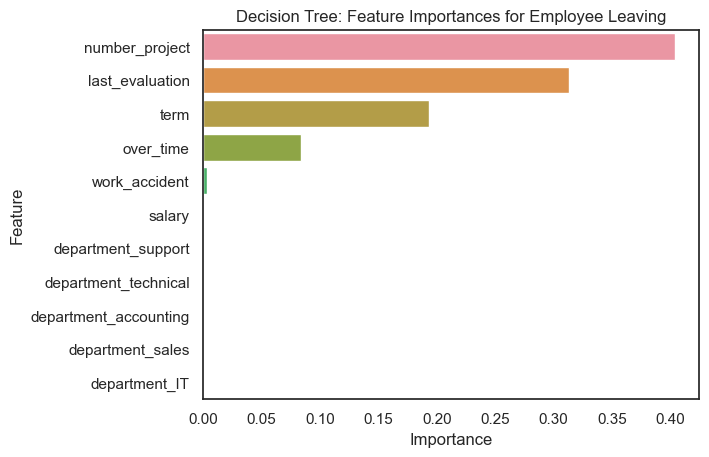

In [82]:
sns.barplot(data=tree2_features, x="Gini importance", y=tree2_features.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

#### Random forest feature importance

In [83]:
rf2_features = pd.DataFrame(rf2.best_estimator_.feature_importances_, 
                                 columns=['Gini importance'], 
                                 index=X.columns
                                )
rf2_features = rf2_features.sort_values(by='Gini importance', ascending=False)

# Only extract the features with importances > 0
rf2_features = rf2_features[rf2_features['Gini importance'] != 0]
rf2_features

Gini importance
number_project                 0.357199
last_evaluation                0.311075
term                           0.226323
over_time                      0.089983
work_accident                  0.004331
salary                         0.003301
department_sales               0.001535
department_technical           0.001297
department_support             0.001070
department_accounting          0.000946
department_hr                  0.000851
department_product_mng         0.000515
department_management          0.000432
department_IT                  0.000348
department_RandD               0.000340
promotion_last_5years          0.000298
department_marketing           0.000155

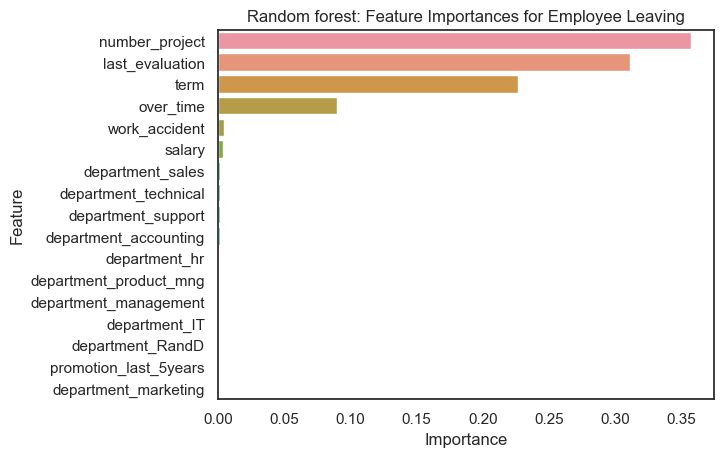

In [86]:
sns.barplot(data=rf2_features, x="Gini importance", y=rf2_features.index, orient='h')
plt.title("Random forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

-> The plot shows that in this random forest model: `last_evaluation`, `number_project`, `term`, and `over_time` are the most important features for predicting left, the same as those used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results.

## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 81% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 94.6%, precision of 91.4%, recall of 91%, f1-score of 91.2%, and accuracy of 97%, on the test set. The random forest modestly outperformed the decision tree model.	

### Conclusion

The models and the feature importances confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented:
- Cap the number of projects that employees can work on.
- Consider promoting employees who have been with the company for at least four years, or investigate further why these employees are dissatisfied.
- Either reward employees for working longer hours or don't require them to do so.
- Inform employees about the company's overtime pay policies and clarify expectations around workload and time off.
- Hold company-wide and team discussions to understand and address the work culture.